# Statistics Exercises

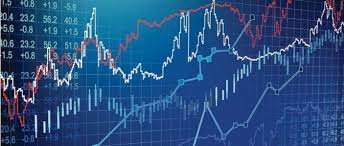

*Source: United Nations Statistics Division*
***
## Exercise 1.1

__*The above (example from Ian's notebook) gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.*__

In [1]:
# importing math and comb modules
import math
from math import comb

In [2]:
# we saw in Ian's example that there are 70 different combinations for selecting the correct cups
math.comb(8,4)

70

In [3]:
# that gives a probability of
1.0 / math.comb(8,4)

0.014285714285714285

In [4]:
# so lets try increasing the number of cups to 9 and keeping the required correct answers to 4 & see the result
math.comb(9,4)

126

In [5]:
# that gives us 126 different combinations, and the probabily of the tester selecting the correct cups would be
1.0 / math.comb(9,4)

0.007936507936507936

Therefore, having 9 cups of tea in this experiment would ensure that the probability of randomly selecting the correct cups is less than or equal to 1% (0.7 % in this case).

<br>

__*BONUS: How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?*__

We saw in this week's lecture that when the total number of cups is 8, the probability of the tester getting 3 out of 4 cups correct is approximately 20%.

Above, we also saw that having 9 cups and requiring 4 to be correct would yield a possibility that is less than or equal to 1%. Let's try increasing the total number of cups & requiring 3 correct answers to see what the probability would be.

In [6]:
# lets try 12 total cups, requiring 3 correct answers and see what we get
math.comb(12,3)

220

In [7]:
# the probability in this case is
1 / math.comb(12,3)

0.004545454545454545

So a total of 12 cups requiring 3 correct answers would be below the 1% threshold, but let's chack it we can reduce the number of cups any further.

In [8]:
# lets try 11 cups
math.comb(11,3)

165

In [9]:
# and now the probability is
1 / math.comb(11,3)

0.006060606060606061

In [10]:
# still < 1% - lets try reducing the number of cups once more
math.comb(10,3)

120

In [11]:
# with a probability of
1 / math.comb(10,3)

0.008333333333333333

So by reducing the number of cups again, we can see that with a total of 10 cups, the probability of having 3 correct answers would be under the 1% threshold.

<br>

***
## Exerise 1.2

__*Use scipy's version of Fisher's exact test to simulate the Lady Tasting Tea problem.*__

In [12]:
import scipy.stats as ss

In [13]:
# using the fisher_exact method from scipy
ss.fisher_exact([[4,0],[0,4]])

(inf, 0.028571428571428567)

<br>

According to https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html, the inf value in the result above is the odds ratio, with inf standing for infinite. The second value then is the probability of returning 4 correct choices from the 8 total cups. This value is almost exactly twice the probability that we calculated earlier (see below for reference).

In [14]:
# probability calculated in exercise 1.1
1.0 / math.comb(8,4)

0.014285714285714285

However, the scipy documentation shows that we can add another parameter to this function:

<i>Parameters  
tablearray_like of ints  
A 2x2 contingency table. Elements must be non-negative integers.  
  
<i><b>alternative</b>{‘two-sided’, ‘less’, ‘greater’}, optional  
Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):  
  
<i>‘two-sided’: the odds ratio of the underlying population is not one  
  
<i>‘less’: the odds ratio of the underlying population is less than one  
  
<i>‘greater’: the odds ratio of the underlying population is greater than one</i>

<br>

Our first test of this function returned an odds ratio of inf, and "two-sided" is the default, so lets try using the other two alternative parameters and see if we get the same answer as we did when we calculated the probability earlier.

In [15]:
# using alternative less
ss.fisher_exact([[4,0],[0,4]], alternative='less')

(inf, 1.0)

In [16]:
# using alternative greater
ss.fisher_exact([[4,0],[0,4]], alternative='greater')

(inf, 0.014285714285714284)

We can see that the third alternative option of "greater" gives us the same result as before, as according to the documentation this should be used when "the odds ratio of the underlying population is greater than one", and in this case the odds ratio is infinite.

<br>

***
## Exerise 1.3

__*Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.*__

For some background information, this is what the [official Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) tells us about the scipy.stats.ttest_ind method:

### scipy.stats.ttest_ind
scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)  
> Calculate the T-test for the means of two independent samples of scores.  
> This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

**Parameters**
> **a, b**: *array_like*  
The arrays must have the same shape, except in the dimension corresponding to axis (the first, by default).

> **axis**: *int or None, optional*  
Axis along which to compute test. If None, compute over the whole arrays, a, and b.

> **equal_var**: *bool, optional*  
If True (default), perform a standard independent 2 sample test that assumes equal population variances [1]. If False, perform Welch’s t-test, which does not assume equal population variance [2].

> **nan_policy**: *{‘propagate’, ‘raise’, ‘omit’}, optional*  
Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):  
- ‘propagate’: returns nan  
- ‘raise’: throws an error  
- ‘omit’: performs the calculations ignoring nan values  

The ‘omit’ option is not currently available for permutation tests or one-sided asympyotic tests.  

> **permutations**: *non-negative int, np.inf, or None (default), optional*  
If 0 or None (default), use the t-distribution to calculate p-values. Otherwise, permutations is the number of random permutations that will be used to estimate p-values using a permutation test. If permutations equals or exceeds the number of distinct partitions of the pooled data, an exact test is performed instead (i.e. each distinct partition is used exactly once). See Notes for details.  

> **random_state**: *{None, int, numpy.random.Generator,numpy.random.RandomState}, optional*  

If seed is None (or np.random), the numpy.random.RandomState singleton is used. If seed is an int, a new RandomState instance is used, seeded with seed. If seed is already a Generator or RandomState instance then that instance is used.  

Pseudorandom number generator state used to generate permutations (used only when permutations is not None).  

> **alternative**: *{‘two-sided’, ‘less’, ‘greater’}, optional*  
Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):  

- ‘two-sided’: the means of the distributions underlying the samples are unequal.
- ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.
- ‘greater’: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.  

> **trim**: *float, optional*  
If nonzero, performs a trimmed (Yuen’s) t-test. Defines the fraction of elements to be trimmed from each end of the input samples. If 0 (default), no elements will be trimmed from either side. The number of trimmed elements from each tail is the floor of the trim times the number of elements. Valid range is [0, .5).


**Returns**  
> **statistic**: *float or array*  
The calculated t-statistic.

> **pvalue**: *float or array*  
The p-value.

<br>
Now lets look at the example provided in the Scipt Stats documentation.

In [17]:
from scipy import stats

# in the doc, np is referenced but not explicitly imported, so lets import numpy here for numerical arrays
import numpy as np

rng = np.random.default_rng()

In [18]:
# first, let's test with two random variate (RVS) samples that have the same mean value
# note that in stats.norm.rvs loc = mean, scale = standard deviation and size is number of values (n)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-1.768250950453557, pvalue=0.07732442442309304)

In [19]:
# adding the equal_var parameter with value False yields the same result, 
# as we know both samples have the same standard deviation (scale)
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=-1.768250950453557, pvalue=0.07732519477266703)

In [20]:
# here we see that ttest_ind underestimates p for unequal variances 
# when we compare rvs1 to rvs3, which has a bigger scale value

rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-1.7078108760755975, pvalue=0.08798243451547987)

In [21]:
# this time we see some variation with equal_var parameter set to False
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=-1.7078108760755977, pvalue=0.08808740693100225)

In [22]:
# comparing rvs1 to rvs4 which has a bigger scale and smaller size shows us that
# the equal variance t-statistic is no longer equal to the unequal variance t-statistic:
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=-1.95643196004496, pvalue=0.05087932981090623)

In [23]:
# with equal_var set to False
stats.ttest_ind(rvs1, rvs4, equal_var=False)

Ttest_indResult(statistic=-1.316825288231967, pvalue=0.1906265803271706)

In [24]:
# finally, lets compare the T-test results when you have a different mean, variance, and size
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-3.238075350259157, pvalue=0.001270021521643109)

In [25]:
# with equal_var set to False
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-2.218363910519889, pvalue=0.028563935371104177)

In [26]:
# this wasn't explored in the documentation, but what if you had two samples 
# with same mean and variance, but with different sizes?
rvs6 = stats.norm.rvs(loc=5, scale=10, size=800, random_state=rng)
stats.ttest_ind(rvs1, rvs6)

Ttest_indResult(statistic=-1.0445968966857555, pvalue=0.29640381144810346)

In [27]:
# when equal_var set to False on above example we see the results are still very similar to the above test
stats.ttest_ind(rvs1, rvs6, equal_var=False)

Ttest_indResult(statistic=-1.0408392727548204, pvalue=0.29819048263654935)

<br>
The documentation also provides the below advice for a permutations test. 

*When performing a permutation test, more permutations typically yields more accurate results.  
Use a np.random.Generator to ensure reproducibility:*

In [28]:
# testing with 10000 random permutations to estimate p-values
stats.ttest_ind(rvs1, rvs5, permutations=10000,
                random_state=rng)

Ttest_indResult(statistic=-3.238075350259157, pvalue=0.0009)

<br>

The last example shows us how to deal with cases where we have two samples, and one has an extreme tail value.

*Take these two samples, one of which has an extreme tail.*

In [29]:
# note that a is a bigger sample, with extreme outlier/tail value 763.3
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

*Use the trim keyword to perform a trimmed (Yuen) t-test. For example, using 20% trimming, trim=.2, the test will reduce the impact of one (np.floor(trim\*len(a))) element from each tail of sample a. It will have no effect on sample b because np.floor(trim\*len(b)) is 0.*

In [30]:
#number of trimmed elements from each tail is the floor of the trim times the number of elements
stats.ttest_ind(a, b, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

<br>

Just for myself, lets see exactly what's happening when we use the trim parameter on sample a as the documentation is a little bit hard to follow.

In [31]:
# taking the code from the Scipy documentatio with trim value 0.2 as above
np.floor(0.2*len(a))

1.0

The result of 0.2 * 7 is 1.4, and the floor method rounds that value down to 1 which is why the effect of the one extreme element in sample a is reduced in the previous example.

<br>

## End
***